[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana11/1_Analisis_Panel.ipynb)

# Introducción

La clase de hoy consiste en una revisión a la metodología Panel, es una generalización de regresión lineal en el caso que tengamos datos cross-seccionales.

In [ ]:
!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
np.set_printoptions(suppress=True)

# Lectura y preparación de los datos

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Cruso-ApsFinancieras/semana11/YB_panel.csv", header=None, names=range(8))
df

,0,1,2,3,4,5,6,7
GDP (USD millions),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000
Argentina,585893.826000,503816.993500,565532.800800,624548.902200,443805.566500,420401.469200,387652.770500,534351.342400
Bahamas,11111.600000,11861.900000,11834.600000,12357.600000,12755.800000,13192.800000,9699.500000,11208.600000
Bolivia,33236.685010,33240.724470,34188.510500,37782.028770,40581.289680,41193.440230,38350.000000,40702.729000
...,...,...,...,...,...,...,...,...
El Salvador,0.000000,0.122301,0.135840,0.143041,0.151213,0.166934,0.156961,0.157505
Guatemala,0.015693,0.011426,0.005939,0.017840,0.043132,0.049531,0.055436,0.057755
Mexico,NaN,NaN,NaN,0.267628,0.221503,0.227797,0.218159,0.218937
Paraguay,0.216607,0.223846,0.216461,0.211030,0.205695,0.200004,0.187921,0.190857


In [ ]:
table_names = ["GDP (USD millions)", "Population (millions)", "Consumer Price Iindex inflation (%)", "Cheques (% of total number of transactions)", "Card payments (% of total number of transactions)", "Credit transfers (% of total number of transactions)", "Average value per transaction (USD)", "Cards with a credit function (number of cards per inhabitant)"]
groups = df.index.isin(table_names).cumsum()
tables = {g.iloc[0,0]: g.iloc[1:] for k,g in df.groupby(groups)}

In [ ]:
groups

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [ ]:
tables

{nan:                                      0             1             2  \
 NaN                       2.014000e+03  2.015000e+03  2.016000e+03   
 Argentina                 5.858938e+05  5.038170e+05  5.655328e+05   
 Bahamas                   1.111160e+04  1.186190e+04  1.183460e+04   
 Bolivia                   3.323669e+04  3.324072e+04  3.418851e+04   
 Brazil                    2.175647e+06  1.535491e+06  1.923638e+06   
 Chile                     2.446565e+05  2.255681e+05  2.540685e+05   
 Colombia                  3.188781e+05  2.555008e+05  2.878592e+05   
 Costa Rica                5.201629e+04  5.644184e+04  5.884693e+04   
 Curacao                   3.158400e+03  1.168030e+04  3.014860e+03   
 Sint Maarten              1.245200e+03  1.253300e+03  1.401844e+03   
 Curacao and Sint Maarten  4.403600e+03  1.293360e+04  4.416704e+03   
 Dominican Republic        6.618658e+04  7.050184e+04  7.480715e+04   
 Ecuador                   1.017263e+05  9.929038e+04  9.993770e+04   
 

In [ ]:
all_dfs = {}

In [ ]:
i = 0
for k,v in tables.items():
  v.columns = v.iloc[0].astype(int)
  if i != 7:
    df_extra = v.iloc[1:-1,:].copy()
  else:
    df_extra = v.iloc[1:,:].copy()
  df_extra.reset_index(inplace=True)
  df_extra.rename(columns={'index':'country'}, inplace=True)
  df_extra = df_extra.melt(id_vars=['country'], value_vars=[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], var_name='year', value_name=table_names[i])
  all_dfs[table_names[i]] = df_extra
  i += 1

In [ ]:
df_extra

,country,year,Cards with a credit function (number of cards per inhabitant)
0,Argentina,2014,1.179658
1,Bahamas,2014,0.435174
2,Bolivia,2014,0.010370
3,Brazil,2014,0.793317
4,Chile,2014,0.559542
...,...,...,...
115,El Salvador,2021,0.157505
116,Guatemala,2021,0.057755
117,Mexico,2021,0.218937
118,Paraguay,2021,0.190857


In [ ]:
df_extra[df_extra['country'] == 'Argentina']

,country,year,Cards with a credit function (number of cards per inhabitant)
0,Argentina,2014,1.179658
15,Argentina,2015,1.273451
30,Argentina,2016,1.343296
45,Argentina,2017,1.382145
60,Argentina,2018,1.403682
75,Argentina,2019,1.347876
90,Argentina,2020,1.344548
105,Argentina,2021,1.189105


## ¿Cómo se ven los datos hasta este momento?

In [ ]:
print(table_names[0])
all_dfs[table_names[0]]

GDP (USD millions)


,country,year,GDP (USD millions)
0,Argentina,2014,5.858938e+05
1,Bahamas,2014,1.111160e+04
2,Bolivia,2014,3.323669e+04
3,Brazil,2014,2.175647e+06
4,Chile,2014,2.446565e+05
...,...,...,...
131,El Salvador,2021,2.873694e+04
132,Guatemala,2021,8.597052e+04
133,Mexico,2021,1.358227e+06
134,Paraguay,2021,3.695720e+04


In [ ]:
a = all_dfs[table_names[0]]
a

,country,year,GDP (USD millions)
0,Argentina,2014,5.858938e+05
1,Bahamas,2014,1.111160e+04
2,Bolivia,2014,3.323669e+04
3,Brazil,2014,2.175647e+06
4,Chile,2014,2.446565e+05
...,...,...,...
131,El Salvador,2021,2.873694e+04
132,Guatemala,2021,8.597052e+04
133,Mexico,2021,1.358227e+06
134,Paraguay,2021,3.695720e+04


In [ ]:
b = all_dfs[table_names[1]]
b

,country,year,Population (millions)
0,Argentina,2014,42.669500
1,Bahamas,2014,0.365920
2,Bolivia,2014,10.383760
3,Brazil,2014,201.717541
4,Chile,2014,17.787617
...,...,...,...
131,El Salvador,2021,6.325830
132,Guatemala,2021,17.109746
133,Mexico,2021,127.996000
134,Paraguay,2021,7.353038


## Combinación de dataframes (merge)

In [ ]:
a.merge(b, right_on=['country', 'year'], left_on=['country', 'year'])

,country,year,GDP (USD millions),Population (millions)
0,Argentina,2014,5.858938e+05,42.669500
1,Bahamas,2014,1.111160e+04,0.365920
2,Bolivia,2014,3.323669e+04,10.383760
3,Brazil,2014,2.175647e+06,201.717541
4,Chile,2014,2.446565e+05,17.787617
...,...,...,...,...
131,El Salvador,2021,2.873694e+04,6.325830
132,Guatemala,2021,8.597052e+04,17.109746
133,Mexico,2021,1.358227e+06,127.996000
134,Paraguay,2021,3.695720e+04,7.353038


In [ ]:
table_names

['GDP (USD millions)',
 'Population (millions)',
 'Consumer Price Iindex inflation (%)',
 'Cheques (% of total number of transactions)',
 'Card payments (% of total number of transactions)',
 'Credit transfers (% of total number of transactions)',
 'Average value per transaction (USD)',
 'Cards with a credit function (number of cards per inhabitant)']

In [ ]:
base = all_dfs[table_names[0]]
for table in table_names[1:]:
  base = base.merge(all_dfs[table], right_on=['country', 'year'], left_on=['country', 'year'])

In [ ]:
base

,country,year,GDP (USD millions),Population (millions),Consumer Price Iindex inflation (%),Cheques (% of total number of transactions),Card payments (% of total number of transactions),Credit transfers (% of total number of transactions),Average value per transaction (USD),Cards with a credit function (number of cards per inhabitant)
0,Argentina,2014,5.858938e+05,42.669500,38.000000,6.596729,81.441438,8.873807,911.503601,1.179658
1,Bahamas,2014,1.111160e+04,0.365920,1.510000,38.919419,49.310207,11.466572,2189.095513,0.435174
2,Bolivia,2014,3.323669e+04,10.383760,5.764602,16.737272,73.397814,0.000000,2870.838870,0.010370
3,Brazil,2014,2.175647e+06,201.717541,6.410000,4.204372,39.655485,35.991358,651.959941,0.793317
4,Chile,2014,2.446565e+05,17.787617,4.708000,17.768593,72.302339,9.929069,704.302111,0.559542
...,...,...,...,...,...,...,...,...,...,...
115,El Salvador,2021,2.873694e+04,6.325830,3.470000,7.323511,56.235662,34.634442,717.257428,0.157505
116,Guatemala,2021,8.597052e+04,17.109746,4.260000,97.789489,1.495953,0.714558,3280.804813,0.057755
117,Mexico,2021,1.358227e+06,127.996000,5.700000,1.647713,62.439066,34.148802,2358.711488,0.218937
118,Paraguay,2021,3.695720e+04,7.353038,6.826568,5.256581,32.792306,43.469588,2272.247651,0.190857


In [ ]:
base[base['country'] == 'Mexico']

,country,year,GDP (USD millions),Population (millions),Consumer Price Iindex inflation (%),Cheques (% of total number of transactions),Card payments (% of total number of transactions),Credit transfers (% of total number of transactions),Average value per transaction (USD),Cards with a credit function (number of cards per inhabitant)
12,Mexico,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Mexico,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Mexico,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Mexico,2017,1209877.849,122.334,6.0,5.623148,64.162137,27.957361,3621.200206,0.267628
72,Mexico,2018,1267033.938,123.976,4.9,4.891807,65.760901,27.206522,3411.697589,0.221503
87,Mexico,2019,1301760.399,125.524,3.6,3.536682,66.987306,27.411904,2924.005927,0.227797
102,Mexico,2020,1176588.317,126.880,3.4,2.332796,64.935827,30.717227,2545.547333,0.218159
117,Mexico,2021,1358227.349,127.996,5.7,1.647713,62.439066,34.148802,2358.711488,0.218937


# Panel

In [ ]:
from linearmodels import PooledOLS, PanelOLS
import statsmodels.api as sm

In [ ]:
base_cop = base.copy()
base_cop.set_index(['country', 'year'], inplace=True)

In [ ]:
base_cop

,,GDP (USD millions),Population (millions),Consumer Price Iindex inflation (%),Cheques (% of total number of transactions),Card payments (% of total number of transactions),Credit transfers (% of total number of transactions),Average value per transaction (USD),Cards with a credit function (number of cards per inhabitant)
country,year,,,,,,,,
Argentina,2014,5.858938e+05,42.669500,38.000000,6.596729,81.441438,8.873807,911.503601,1.179658
Bahamas,2014,1.111160e+04,0.365920,1.510000,38.919419,49.310207,11.466572,2189.095513,0.435174
Bolivia,2014,3.323669e+04,10.383760,5.764602,16.737272,73.397814,0.000000,2870.838870,0.010370
Brazil,2014,2.175647e+06,201.717541,6.410000,4.204372,39.655485,35.991358,651.959941,0.793317
Chile,2014,2.446565e+05,17.787617,4.708000,17.768593,72.302339,9.929069,704.302111,0.559542
...,...,...,...,...,...,...,...,...,...
El Salvador,2021,2.873694e+04,6.325830,3.470000,7.323511,56.235662,34.634442,717.257428,0.157505
Guatemala,2021,8.597052e+04,17.109746,4.260000,97.789489,1.495953,0.714558,3280.804813,0.057755
Mexico,2021,1.358227e+06,127.996000,5.700000,1.647713,62.439066,34.148802,2358.711488,0.218937


In [ ]:
years = base_cop.index.get_level_values("year").to_list()

In [ ]:
base_cop['year'] = pd.Categorical(years)

In [ ]:
base_cop.columns

Index(['GDP (USD millions)', 'Population (millions)',
       'Consumer Price Iindex inflation (%)',
       'Cheques (% of total number of transactions)',
       'Card payments (% of total number of transactions)',
       'Credit transfers (% of total number of transactions)',
       'Average value per transaction (USD)',
       'Cards with a credit function (number of cards per inhabitant)',
       'year'],
      dtype='object')

## Modelo

In [ ]:
exog = sm.tools.tools.add_constant(base_cop['Cheques (% of total number of transactions)'])
endog = base_cop['Card payments (% of total number of transactions)']
mod1 = PanelOLS(endog, exog, entity_effects=True, time_effects=True)
mod2 = PanelOLS(endog, exog, entity_effects=True)
mod3 = PanelOLS(endog, exog)

pooledOLS_res1 = mod1.fit(cov_type="clustered", cluster_entity=True)
pooledOLS_res2 = mod2.fit(cov_type="clustered", cluster_entity=True)
pooledOLS_res3 = mod3.fit(cov_type="clustered", cluster_entity=True)

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res3.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res3.resids

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [ ]:
# Incluye el efecto de "entity" y "time"
pooledOLS_res1.summary

Dep. Variable:,Card payments (% of total number of transactions),R-squared:,0.0052
Estimator:,PanelOLS,R-squared (Between):,-0.5036
No. Observations:,117,R-squared (Within):,-0.0111
Date:,"Tue, Jun 20 2023",R-squared (Overall):,-0.3338
Time:,23:46:46,Log-likelihood,-471.97
Cov. Estimator:,Clustered,,
,,F-statistic:,0.4875
Entities:,15,P-value,0.4867
Avg Obs:,7.8000,Distribution:,"F(1,94)"
Min Obs:,5.0000,,
Max Obs:,8.0000,F-statistic (robust):,0.0483


In [ ]:
# Incluye el efecto de entity
pooledOLS_res2.summary

Dep. Variable:,Card payments (% of total number of transactions),R-squared:,0.0002
Estimator:,PanelOLS,R-squared (Between):,0.0694
No. Observations:,117,R-squared (Within):,0.0002
Date:,"Tue, Jun 20 2023",R-squared (Overall):,0.0456
Time:,23:46:46,Log-likelihood,-476.71
Cov. Estimator:,Clustered,,
,,F-statistic:,0.0244
Entities:,15,P-value,0.8761
Avg Obs:,7.8000,Distribution:,"F(1,101)"
Min Obs:,5.0000,,
Max Obs:,8.0000,F-statistic (robust):,0.0036


In [ ]:
# Ningún efecto
pooledOLS_res3.summary

Dep. Variable:,Card payments (% of total number of transactions),R-squared:,0.3359
Estimator:,PanelOLS,R-squared (Between):,0.5354
No. Observations:,117,R-squared (Within):,-0.0419
Date:,"Tue, Jun 20 2023",R-squared (Overall):,0.3359
Time:,23:46:46,Log-likelihood,-515.34
Cov. Estimator:,Clustered,,
,,F-statistic:,58.173
Entities:,15,P-value,0.0000
Avg Obs:,7.8000,Distribution:,"F(1,115)"
Min Obs:,5.0000,,
Max Obs:,8.0000,F-statistic (robust):,40.592


In [ ]:
pooledOLS_res3.params

const                                          64.262954
Cheques (% of total number of transactions)    -0.583080
Name: parameter, dtype: float64

In [ ]:
pooledOLS_res1.estimated_effects.loc['Argentina', :]

,estimated_effects
year,
2014,13.023068
2015,19.588742
2016,23.133760
2017,24.136749
2018,25.524299
2019,27.252459
2020,24.656609
2021,19.033196


In [ ]:
pooledOLS_res2.estimated_effects.loc['Argentina', :]

,estimated_effects
year,
2014,18.930798
2015,18.930798
2016,18.930798
2017,18.930798
2018,18.930798
2019,18.930798
2020,18.930798
2021,18.930798


In [ ]:
pooledOLS_res3.estimated_effects

,,estimated_effects
country,year,
Argentina,2014,0.0
Bahamas,2014,0.0
Bolivia,2014,0.0
Brazil,2014,0.0
Chile,2014,0.0
...,...,...
El Salvador,2021,0.0
Guatemala,2021,0.0
Mexico,2021,0.0


# Resultados

In [ ]:
fittedvals_pooled_OLS

country              year
Argentina            2014    60.416532
Bahamas              2014    41.569813
Bolivia              2014    54.503783
Brazil               2014    61.811468
Chile                2014    53.902440
                               ...    
El Salvador          2021    59.992760
Guatemala            2021     7.243844
Mexico               2021    63.302205
Paraguay             2021    61.197946
Trinidad and Tobago  2021    59.565204
Name: fitted_values, Length: 117, dtype: float64

In [ ]:
endog

country              year
Argentina            2014    81.441438
Bahamas              2014    49.310207
Bolivia              2014    73.397814
Brazil               2014    39.655485
Chile                2014    72.302339
                               ...    
El Salvador          2021    56.235662
Guatemala            2021     1.495953
Mexico               2021    62.439066
Paraguay             2021    32.792306
Trinidad and Tobago  2021    67.325072
Name: Card payments (% of total number of transactions), Length: 120, dtype: float64

## Resultados específicos (un país)

In [ ]:
endog['Argentina',:]

year
2014    81.441438
2015    82.009116
2016    82.796876
2017    80.940579
2018    79.213484
2019    76.606686
2020    59.979874
2021    56.712779
Name: Card payments (% of total number of transactions), dtype: float64

In [ ]:
exog.loc['Argentina']['Cheques (% of total number of transactions)']

year
2014    6.596729
2015    5.753289
2016    4.754781
2017    4.261449
2018    3.634732
2019    2.829001
2020    1.621015
2021    1.187134
Name: Cheques (% of total number of transactions), dtype: float64

# Comparativos

In [ ]:
base.country.unique()

array(['Argentina', 'Bahamas', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Curacao and Sint Maarten', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Guatemala', 'Mexico', 'Paraguay',
       'Trinidad and Tobago'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt

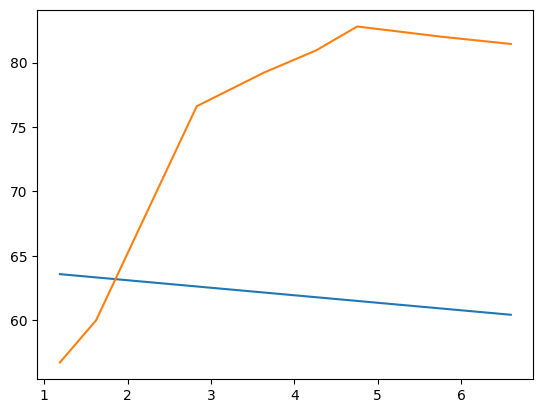

In [ ]:
FLAG='Argentina'
plt.plot(exog.loc[FLAG]['Cheques (% of total number of transactions)'], fittedvals_pooled_OLS[FLAG,:]) # Para méxico, agregar el [3:]
plt.plot(exog.loc[FLAG]['Cheques (% of total number of transactions)'], endog[FLAG,:])

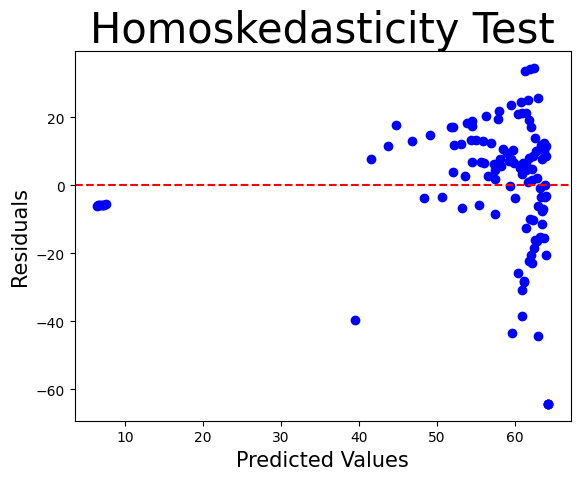

In [ ]:
# 3A. Homoskedasticity

 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [ ]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([base_cop, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(base_cop['Card payments (% of total number of transactions)']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
print(dict(zip(labels, white_test_results)))
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 30.315445543443992, 'LM p-val': 2.6126705023959407e-07, 'F-Stat': 19.77434771279987, 'F p-val': 3.9983418338165975e-08}
{'LM-Stat': 16.612098822203627, 'LM p-val': 4.585755192627709e-05, 'F-Stat': 18.959932822787653, 'F p-val': 2.8594641714936822e-05}


El test de autocorrelación lanza un número entre 0 y 4. Si es cercano al cero hay mas corelacciónb positiva, si es mas cercano a 4 significa autocorrelación negativa.

In [ ]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual'])
print(durbin_watson_test_results)

2.000721800077193
